# 1. Import and Install Dependencies

In [1]:
!pip install -r requirements.txt

In [1]:
import cv2
import numpy as np
import os
from matplotlib import pyplot as plt
import time
import mediapipe as mp

# 2. Keypoints using MP Holistic

In [2]:
mp_holistic = mp.solutions.holistic # Holistic model
mp_drawing = mp.solutions.drawing_utils # Drawing utilities

In [3]:
def mediapipe_detection(image, model):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) # COLOR CONVERSION BGR 2 RGB
    image.flags.writeable = False                  # Image is no longer writeable
    results = model.process(image)                 # Make prediction
    image.flags.writeable = True                   # Image is now writeable 
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR) # COLOR COVERSION RGB 2 BGR
    return image, results

In [4]:
def draw_landmarks(image, results):
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_TESSELATION) # Draw face connections
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS) # Draw pose connections
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS) # Draw left hand connections
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS) # Draw right hand connections

In [5]:
def draw_styled_landmarks(image, results):
    # Draw face connections
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_TESSELATION, 
                             mp_drawing.DrawingSpec(color=(80,110,10), thickness=1, circle_radius=1), 
                             mp_drawing.DrawingSpec(color=(80,256,121), thickness=1, circle_radius=1)
                             ) 
    # Draw pose connections
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS,
                             mp_drawing.DrawingSpec(color=(80,22,10), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(80,44,121), thickness=2, circle_radius=2)
                             ) 
    # Draw left hand connections
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                             mp_drawing.DrawingSpec(color=(121,22,76), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(121,44,250), thickness=2, circle_radius=2)
                             ) 
    # Draw right hand connections  
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                             mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2)
                             ) 

In [7]:
cap = cv2.VideoCapture(1)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():

        # Read feed
        ret, frame = cap.read()

        # Make detections
        image, results = mediapipe_detection(frame, holistic)
        print(results)
        
        # Draw landmarks
        draw_styled_landmarks(image, results)

        # Show to screen
        cv2.imshow('OpenCV Feed', image)

        # Break gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

In [8]:
draw_landmarks(frame, results)

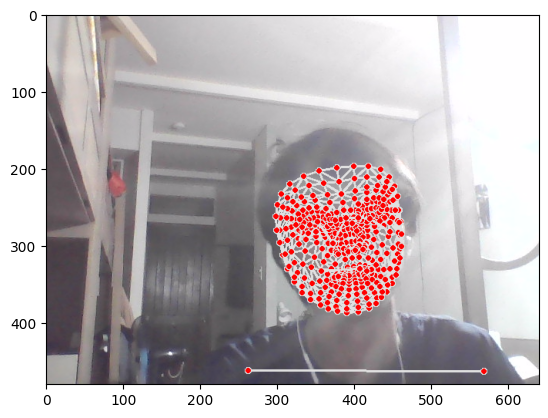

In [9]:
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

# 3. Extract Keypoint Values

In [6]:
def extract_keypoints(results):
    pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(33*4)
    face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(468*3)
    lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
    rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)
    return np.concatenate([pose, face, lh, rh])

In [122]:
result_test = extract_keypoints(results)

# 4. Setup Folders for Collection

In [253]:
import json

# Path for exported data, numpy arrays
DATA_PATH = os.path.join('MP_Data')

# Actions that we try to detect
with open('data/wlasl_class_list.txt', 'r') as wlasl_class_list:
    actions = [line.strip().split('\t')[1] for line in wlasl_class_list.readlines()]

# Read missing actions
with open('data/missing.txt', 'r') as missing_txt:
    missing_actions = [line.strip() for line in missing_txt.readlines()]

# Load the JSON data
with open('data/WLASL_v0.3.json', 'r') as data_json:
    data = json.load(data_json)  # Keeps data as a Python list/dictionary

with open('data/include.txt', 'r') as include_txt:
    actions = [line.strip() for line in include_txt.readlines()]

# for item in data:
#     print(f"Gloss: {item['gloss']}")
#     for instance in item["instances"]:
#         print(f"  Video Id: {instance['video_id']}")

['drink', 'hello', 'book', 'love']


In [272]:
# for action in actions: 
#     os.makedirs(os.path.join(DATA_PATH, action))

for action in actions:
    try:
        os.makedirs(os.path.join(DATA_PATH, action))
    except:
        pass

# 5. Collect Keypoint Values for Training and Testing

In [273]:
count = 0
with mp_holistic.Holistic(min_detection_confidence=0.2, min_tracking_confidence=0.5) as holistic:
    for item in data:
        if count == 4:
            break
        gloss = item['gloss']
        if gloss not in actions:
            continue

        for instance in item['instances']:
            video_id = instance['video_id']
            if video_id in missing_actions:
                continue

            video_path = os.path.join("data", "videos", video_id + '.mp4')

            try: 
                os.mkdir(os.path.join(DATA_PATH, gloss, video_id))
            except:
                pass

            # Read video
            cap = cv2.VideoCapture(video_path)
            if not cap.isOpened():
                print(f"Failed to open video: {video_path}")
                continue
            frame_count = 0

            while True:
                ret, frame = cap.read()
                if not ret:
                    break

                image, results = mediapipe_detection(frame, holistic)
                keypoints = extract_keypoints(results)
                np.save(os.path.join(DATA_PATH, gloss, video_id, str(frame_count)), keypoints)
                frame_count += 1

            cap.release()
            print("Done with video: ", video_id)
        count += 1
        print("Done with gloss: ", gloss)

Done with video:  69241
Done with video:  07069
Done with video:  07068
Done with video:  07070
Done with video:  07099
Done with video:  07074
Done with gloss:  book
Done with video:  69302
Done with video:  65539
Done with video:  17710
Done with video:  17733
Done with video:  65540
Done with video:  17734
Done with video:  17711
Done with video:  17712
Done with video:  17713
Done with video:  17709
Done with video:  17720
Done with video:  17721
Done with video:  17722
Done with video:  17723
Done with video:  17724
Done with gloss:  drink
Done with video:  27184
Done with video:  27172
Done with video:  27173
Done with video:  27177
Done with gloss:  hello
Done with video:  34123
Done with video:  34124
Done with video:  34127
Done with video:  34128
Done with video:  34129
Done with video:  34121
Done with video:  34137
Done with gloss:  love


In [ ]:
# from numpy import floor

# count = 0
# with mp_holistic.Holistic(min_detection_confidence=0.2, min_tracking_confidence=0.5) as holistic:
#     for item in data:
#         if count == 3:
#             break
#         gloss = item['gloss']
#         if gloss not in actions:
#             continue

#         for instance in item['instances']:
#             video_id = instance['video_id']
#             if video_id in missing_actions:
#                 continue

#             video_path = os.path.join("data", "videos", video_id + '.mp4')

#             try: 
#                 os.mkdir(os.path.join(DATA_PATH, gloss, video_id))
#             except:
#                 pass

#             # Read video
#             cap = cv2.VideoCapture(video_path)
#             if not cap.isOpened():
#                 print(f"Failed to open video: {video_path}")
#                 continue
#             max_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
#             a = floor(max_frames / 30)
#             print(video_id, ": ", max_frames, ":", a)
#             frame_count = 0
#             current = 0
#             if max_frames < 30:
#                 continue
#             keypoints = None
#             while True:
#                 ret, frame = cap.read()
#                 if frame_count == 30:
#                     break

#                 if current % a == 0:
#                     if not ret:
#                         np.save(os.path.join(DATA_PATH, gloss, video_id, str(frame_count)), keypoints)
#                         break
#                     image, results = mediapipe_detection(frame, holistic)
#                     keypoints = extract_keypoints(results)
#                     np.save(os.path.join(DATA_PATH, gloss, video_id, str(frame_count)), keypoints)
#                     frame_count += 1

#                 current += 1

#                 # cv2.imshow('OpenCV Feed', image)
#                 # cv2.waitKey(25)
#             cap.release()
#             print("Done with video: ", video_id)
#         count += 1
#         print("Done with gloss: ", gloss)
#         print("Remaining actions: ", actions[actions.index(gloss)+1:])

69241 :  75 : 2.0
Done with video:  69241
07069 :  30 : 1.0
Done with video:  07069
07068 :  68 : 2.0
Done with video:  07068
07070 :  86 : 2.0
Done with video:  07070
07099 :  87 : 2.0
Done with video:  07099
07074 :  41 : 1.0
Done with video:  07074
Done with gloss:  book
Remaining actions:  ['drink', 'clothes', 'who', 'candy', 'cousin', 'deaf', 'fine', 'help', 'no', 'thin', 'walk', 'year', 'yes', 'all', 'black', 'cool', 'finish', 'hot', 'like', 'many', 'mother', 'now', 'orange', 'table', 'thanksgiving', 'what', 'woman', 'bed', 'blue', 'bowling', 'can', 'dog', 'family', 'fish', 'graduate', 'hat', 'hearing', 'kiss', 'language', 'later', 'man', 'shirt', 'study', 'tall', 'white', 'wrong', 'accident', 'apple', 'bird', 'change', 'color', 'corn', 'cow', 'dance', 'dark', 'doctor', 'eat', 'enjoy', 'forget', 'give', 'last', 'meet', 'pink', 'pizza', 'play', 'school', 'secretary', 'short', 'time', 'want', 'work', 'africa', 'basketball', 'birthday', 'brown', 'but', 'cheat', 'city', 'cook', 'deci

In [11]:
cap.release()
cv2.destroyAllWindows()

# 6. Preprocess Data and Create Labels and Features

In [23]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [274]:
label_map = {label:num for num, label in enumerate(actions)}

In [275]:
label_map

{'drink': 0, 'hello': 1, 'book': 2, 'love': 3}

In [276]:
sequences, labels = [], []
for action in actions:
    for sequence in np.array(os.listdir(os.path.join(DATA_PATH, action))):
        window = []

        for i in range(0, len(os.listdir(os.path.join(DATA_PATH, action, sequence)))):
            res = np.load(os.path.join(DATA_PATH, action, sequence, "{}.npy".format(i)))
            window.append(res)
        sequences.append(window)
        labels.append(label_map[action])


# sequences, labels = [], []
# for action in actions:
#     for sequence in np.array(os.listdir(os.path.join(DATA_PATH, action))):
#         window = []
#         for frame_num in range(30):
#             res = np.load(os.path.join(DATA_PATH, action, sequence, "{}.npy".format(frame_num)))
#             window.append(res)
#         sequences.append(window)
#         labels.append(label_map[action])


In [277]:
sequences_padded = pad_sequences(sequences, padding='post', dtype='float32', value = 0)
sequences = np.array(sequences_padded)
np.array(sequences).shape

(32, 121, 1662)

In [278]:
np.array(labels).shape

(32,)

In [279]:
X = np.array(sequences)

In [280]:
X.shape

(32, 121, 1662)

In [281]:
y = to_categorical(labels).astype(int)

In [282]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05)

In [283]:
y_test.shape

(2, 4)

# 7. Build and Train LSTM Neural Network

In [107]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, GlobalMaxPooling1D
from tensorflow.keras.callbacks import TensorBoard

In [284]:
log_dir = os.path.join('Logs')
tb_callback = TensorBoard(log_dir=log_dir)

In [297]:
model = Sequential()

# First convolutional layer (using Conv1D for sequential data)
model.add(Conv1D(64, kernel_size=3, activation='relu', input_shape=(None, 1662)))
model.add(MaxPooling1D(pool_size=2))  # Optional: Max pooling after convolution

# Second convolutional layer
model.add(Conv1D(128, kernel_size=3, activation='relu'))
model.add(MaxPooling1D(pool_size=2))  # Optional: Max pooling

# Third convolutional layer
model.add(Conv1D(64, kernel_size=3, activation='relu'))
model.add(MaxPooling1D(pool_size=2))  # Optional: Max pooling

# Global pooling layer to reduce sequence length to a fixed size
model.add(GlobalMaxPooling1D())  # This reduces the output to a single vector

# Fully connected (Dense) layers
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))

# Output layer with softmax activation (for classification)
model.add(Dense(4, activation='softmax'))


# model.add(LSTM(64, return_sequences=True, activation='relu', input_shape=(30,1662)))
# model.add(LSTM(128, return_sequences=True, activation='relu'))
# model.add(LSTM(64, return_sequences=False, activation='relu'))
# model.add(Dense(64, activation='relu'))
# model.add(Dense(32, activation='relu'))
# model.add(Dense(4, activation='softmax'))


model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['categorical_accuracy'])

In [298]:
model.fit(X_train, y_train, epochs=1000, callbacks=[tb_callback])

Epoch 1/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - categorical_accuracy: 0.4667 - loss: 1.3549
Epoch 2/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step - categorical_accuracy: 0.4667 - loss: 1.3441
Epoch 3/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step - categorical_accuracy: 0.4667 - loss: 1.2767
Epoch 4/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - categorical_accuracy: 0.4667 - loss: 1.2639
Epoch 5/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - categorical_accuracy: 0.4667 - loss: 1.2373
Epoch 6/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - categorical_accuracy: 0.4667 - loss: 1.2141
Epoch 7/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - categorical_accuracy: 0.5000 - loss: 1.1850
Epoch 8/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - categorical_accuracy: 0.5000 - loss: 1.1645
Epoch 9/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - categorical_accuracy: 0.5000 - loss: 1.1376
Epoch 10/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step - categorical_accuracy: 0.5000 - loss: 1.1056
Epoch 11/1000
1/1 ━━━━━━━━━━━━━

KeyboardInterrupt: 

In [244]:
model.summary()

Model: "sequential_25"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_38 (LSTM)                  │ (None, 30, 64)         │       442,112 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_39 (LSTM)                  │ (None, 30, 128)        │        98,816 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_40 (LSTM)                  │ (None, 64)             │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_65 (Dense)                │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_66 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_67 (Dense)                │ (None, 3)              │            99 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,790,027 (6.83 MB)

 Trainable params: 596,675 (2.28 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 1,193,352 (4.55 MB)

# 8. Make Predictions

In [271]:
res = model.predict(X_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


In [168]:
actions[np.argmax(res[4])]

IndexError: index 4 is out of bounds for axis 0 with size 3

In [30]:
actions[np.argmax(y_test[4])]

'hello'

# 9. Save Weights

In [272]:
model.save('action.h5')

In [217]:
del model

In [34]:
model.load_weights('action.h5')

# 10. Evaluation using Confusion Matrix and Accuracy

In [82]:
from sklearn.metrics import multilabel_confusion_matrix, accuracy_score

In [299]:
yhat = model.predict(X_test)
ytrue = np.argmax(y_test, axis=1).tolist()
yhat = np.argmax(yhat, axis=1).tolist()
multilabel_confusion_matrix(ytrue, yhat)

accuracy_score(ytrue, yhat)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


1.0

# 11. Test in Real Time

In [87]:
from scipy import stats

In [292]:
colors = [(245,117,16), (117,245,16), (16,117,245), (16,117,245)]
def prob_viz(res, actions, input_frame, colors):
    output_frame = input_frame.copy()
    for num, prob in enumerate(res):
        cv2.rectangle(output_frame, (0,60+num*40), (int(prob*100), 90+num*40), colors[num], -1)
        cv2.putText(output_frame, actions[num], (0, 85+num*40), cv2.FONT_HERSHEY_SIMPLEX, 1, (255,255,255), 2, cv2.LINE_AA)
        
    return output_frame

In [290]:
plt.figure(figsize=(18,18))
plt.imshow(prob_viz(res, actions, image, colors))

IndexError: list index out of range

<Figure size 1800x1800 with 0 Axes>

In [302]:
# 1. New detection variables
sequence = []
sentence = []
predictions = []
threshold = 0.8

cap = cv2.VideoCapture(1)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():

        # Read feed
        ret, frame = cap.read()

        # Make detections
        image, results = mediapipe_detection(frame, holistic)
        
        # Draw landmarks
        draw_styled_landmarks(image, results)
        
        # 2. Prediction logic
        keypoints = extract_keypoints(results)
        sequence.append(keypoints)
        sequence = sequence[-30:]
        
        if len(sequence) == 30:
            res = model.predict(np.expand_dims(sequence, axis=0))[0]

            for num, prob in enumerate(res):
                print(prob)
                if prob > threshold:
                    print(actions[np.argmax(res)])
            predictions.append(np.argmax(res))
            # print(res)
            
            
        #3. Viz logic
            if np.unique(predictions[-10:])[0]==np.argmax(res): 
                if res[np.argmax(res)] > threshold: 
                    
                    if len(sentence) > 0: 
                        if actions[np.argmax(res)] != sentence[-1]:
                            sentence.append(actions[np.argmax(res)])
                    else:
                        sentence.append(actions[np.argmax(res)])

            if len(sentence) > 5: 
                sentence = sentence[-5:]

            # Viz probabilities
            image = prob_viz(res, actions, image, colors)
            
        cv2.rectangle(image, (0,0), (640, 40), (245, 117, 16), -1)
        cv2.putText(image, ' '.join(sentence), (3,30), 
                       cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)
        
        # Show to screen
        cv2.imshow('OpenCV Feed', image)

        # Break gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

InvalidArgumentError: Graph execution error:

Detected at node sequential_30_1/conv1d_40_1/convolution defined at (most recent call last):
  File "<frozen runpy>", line 198, in _run_module_as_main

  File "<frozen runpy>", line 88, in _run_code

  File "C:\Users\Kuugang\AppData\Roaming\Python\Python312\site-packages\ipykernel_launcher.py", line 18, in <module>

  File "C:\Users\Kuugang\AppData\Roaming\Python\Python312\site-packages\traitlets\config\application.py", line 1075, in launch_instance

  File "C:\Users\Kuugang\AppData\Roaming\Python\Python312\site-packages\ipykernel\kernelapp.py", line 739, in start

  File "C:\Users\Kuugang\AppData\Roaming\Python\Python312\site-packages\tornado\platform\asyncio.py", line 205, in start

  File "c:\Users\Kuugang\AppData\Local\Programs\Python\Python312\Lib\asyncio\base_events.py", line 641, in run_forever

  File "c:\Users\Kuugang\AppData\Local\Programs\Python\Python312\Lib\asyncio\base_events.py", line 1986, in _run_once

  File "c:\Users\Kuugang\AppData\Local\Programs\Python\Python312\Lib\asyncio\events.py", line 88, in _run

  File "C:\Users\Kuugang\AppData\Roaming\Python\Python312\site-packages\ipykernel\kernelbase.py", line 545, in dispatch_queue

  File "C:\Users\Kuugang\AppData\Roaming\Python\Python312\site-packages\ipykernel\kernelbase.py", line 534, in process_one

  File "C:\Users\Kuugang\AppData\Roaming\Python\Python312\site-packages\ipykernel\kernelbase.py", line 437, in dispatch_shell

  File "C:\Users\Kuugang\AppData\Roaming\Python\Python312\site-packages\ipykernel\ipkernel.py", line 362, in execute_request

  File "C:\Users\Kuugang\AppData\Roaming\Python\Python312\site-packages\ipykernel\kernelbase.py", line 778, in execute_request

  File "C:\Users\Kuugang\AppData\Roaming\Python\Python312\site-packages\ipykernel\ipkernel.py", line 449, in do_execute

  File "C:\Users\Kuugang\AppData\Roaming\Python\Python312\site-packages\ipykernel\zmqshell.py", line 549, in run_cell

  File "C:\Users\Kuugang\AppData\Roaming\Python\Python312\site-packages\IPython\core\interactiveshell.py", line 3075, in run_cell

  File "C:\Users\Kuugang\AppData\Roaming\Python\Python312\site-packages\IPython\core\interactiveshell.py", line 3130, in _run_cell

  File "C:\Users\Kuugang\AppData\Roaming\Python\Python312\site-packages\IPython\core\async_helpers.py", line 128, in _pseudo_sync_runner

  File "C:\Users\Kuugang\AppData\Roaming\Python\Python312\site-packages\IPython\core\interactiveshell.py", line 3334, in run_cell_async

  File "C:\Users\Kuugang\AppData\Roaming\Python\Python312\site-packages\IPython\core\interactiveshell.py", line 3517, in run_ast_nodes

  File "C:\Users\Kuugang\AppData\Roaming\Python\Python312\site-packages\IPython\core\interactiveshell.py", line 3577, in run_code

  File "C:\Users\Kuugang\AppData\Local\Temp\ipykernel_27296\1241937330.py", line 27, in <module>

  File "c:\Users\Kuugang\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\utils\traceback_utils.py", line 117, in error_handler

  File "c:\Users\Kuugang\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\backend\tensorflow\trainer.py", line 510, in predict

  File "c:\Users\Kuugang\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\backend\tensorflow\trainer.py", line 208, in one_step_on_data_distributed

  File "c:\Users\Kuugang\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\backend\tensorflow\trainer.py", line 198, in one_step_on_data

  File "c:\Users\Kuugang\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\backend\tensorflow\trainer.py", line 96, in predict_step

  File "c:\Users\Kuugang\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\utils\traceback_utils.py", line 117, in error_handler

  File "c:\Users\Kuugang\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\layer.py", line 899, in __call__

  File "c:\Users\Kuugang\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\utils\traceback_utils.py", line 117, in error_handler

  File "c:\Users\Kuugang\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\ops\operation.py", line 46, in __call__

  File "c:\Users\Kuugang\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\utils\traceback_utils.py", line 156, in error_handler

  File "c:\Users\Kuugang\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\models\sequential.py", line 213, in call

  File "c:\Users\Kuugang\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\models\functional.py", line 182, in call

  File "c:\Users\Kuugang\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\ops\function.py", line 171, in _run_through_graph

  File "c:\Users\Kuugang\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\models\functional.py", line 584, in call

  File "c:\Users\Kuugang\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\utils\traceback_utils.py", line 117, in error_handler

  File "c:\Users\Kuugang\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\layer.py", line 899, in __call__

  File "c:\Users\Kuugang\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\utils\traceback_utils.py", line 117, in error_handler

  File "c:\Users\Kuugang\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\ops\operation.py", line 46, in __call__

  File "c:\Users\Kuugang\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\utils\traceback_utils.py", line 156, in error_handler

  File "c:\Users\Kuugang\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\conv1d.py", line 151, in call

  File "c:\Users\Kuugang\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\ops\nn.py", line 901, in conv

  File "c:\Users\Kuugang\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\backend\tensorflow\nn.py", line 258, in conv

  File "c:\Users\Kuugang\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\backend\tensorflow\nn.py", line 231, in _conv

Computed output size would be negative: -1 [input_size: 1, effective_filter_size: 3, stride: 1]
	 [[{{node sequential_30_1/conv1d_40_1/convolution}}]] [Op:__inference_one_step_on_data_distributed_844584]

In [291]:
cap.release()
cv2.destroyAllWindows()